## TEIRV Model

This code runs the TEIRV Model example. The compartmental model is described in the following diagram:

<img src="./src/images/TEIRV_Compartmental.png" height="200">


In [1]:
import sys
sys.path.append('./src/')
import jsf

import pandas as pd
import random
import matplotlib.pyplot as plt


# Define the initial conditions
T0 = 8*pow(10, 7)
E0 = 1
I0 = 1
R0 = 0
V0 = 10

# Define the Parameters
pbeta = pow(10, -8)
pk = 2
pdelta = 4.0
ppi = 400
pc = 10
pPhi = 11*pow(10, -5)
prho = 0.005

# Define the final time
t_max = 20

x0 =              [T0, R0, E0, I0, V0]

# Define the stoichiometry
reactant_matrix =[[1,  0,  0,  0,  1],
                  [0,  0,  1,  0,  0],
                  [0,  0,  0,  1,  0],
                  [0,  0,  0,  1,  0],
                  [0,  0,  0,  0,  1],
                  [1,  0,  0,  1,  0],
                  [0,  1,  0,  0,  0]]

product_matrix = [[0,  0,  1,  0,  1],
                  [0,  0,  0,  1,  0],
                  [0,  0,  0,  0,  0],
                  [0,  0,  0,  1,  1],
                  [0,  0,  0,  0,  0],
                  [0,  1,  0,  1,  0],
                  [1,  0,  0,  0,  0]]

# Define the rates
rates = lambda x, t: [pbeta  * x[0] * x[4],
                      pk     * x[2],
                      pdelta * x[3],
                      ppi    * x[3],
                      pc     * x[4],
                      pPhi   * x[0] * x[3],
                      prho   * x[1]]

stoich = {
         "nu": [ [a - b for a, b in zip(r1, r2)]
                for r1, r2 in zip(product_matrix, reactant_matrix) ],
         "DoDisc": [0, 0, 0, 0, 0],
         "nuReactant": reactant_matrix,
         "nuProduct": product_matrix,
         }

my_opts = {
            "EnforceDo": [0, 0, 0, 0, 0],
            "dt": 0.0001,
            "SwitchingThreshold": [100, 100, 100, 100, 100]
           }


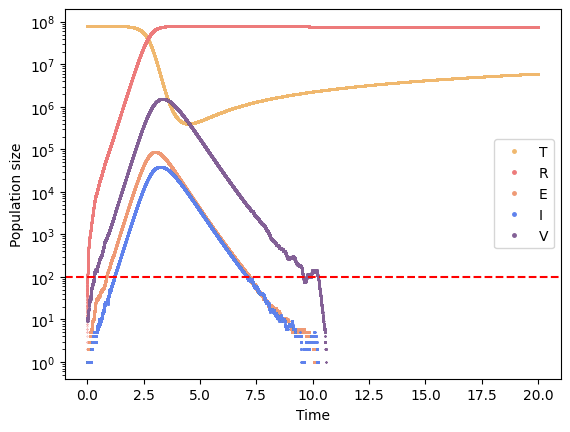

In [3]:
sim = jsf.jsf(x0, rates, stoich, t_max, config=my_opts, method="operator-splitting")

plt.plot(sim[1], sim[0][0], label="T", marker=".", markersize=0.5, linewidth=0, color=(0.9412, 0.7216, 0.4314))
plt.plot(sim[1], sim[0][1], label="R", marker=".", markersize=0.5, linewidth=0, color=(0.9294, 0.4824, 0.4824))
plt.plot(sim[1], sim[0][2], label="E", marker=".", markersize=0.5, linewidth=0, color=(0.9353, 0.6020, 0.4569))
plt.plot(sim[1], sim[0][3], label="I", marker=".", markersize=0.5, linewidth=0, color=(0.3725, 0.5098, 0.9294))
plt.plot(sim[1], sim[0][4], label="V", marker=".", markersize=0.5, linewidth=0, color=(0.5137, 0.3765, 0.5882))

plt.axhline(y=my_opts["SwitchingThreshold"][1], color="r", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Population size")
plt.legend(loc="right", markerscale=10., scatterpoints=1, fontsize=10)

plt.yscale("log")
plt.show()